In [113]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as smf

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [114]:
df = pd.read_csv('bank.csv', sep=';')
df = df.dropna()
print(df.shape)

(41188, 21)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [116]:
# rename column y to class
df.rename(columns={'y': 'class'}, inplace=True)

In [117]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [118]:
df['class'].value_counts()

class
no     36548
yes     4640
Name: count, dtype: int64

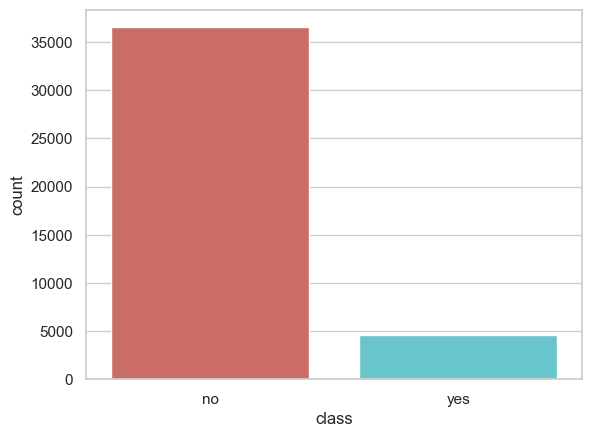

In [119]:
sns.countplot(x='class', data=df, palette='hls')
plt.show()

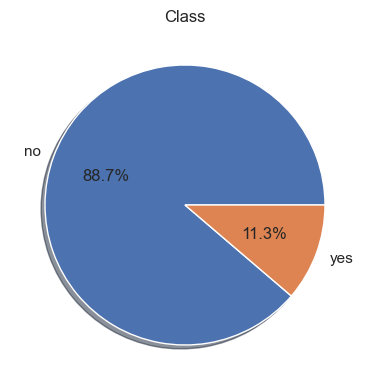

In [120]:
# create pie chart
plt.figure(figsize=(10, 10))
plt.subplot(221)
df['class'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Class')
plt.ylabel('')
plt.show()

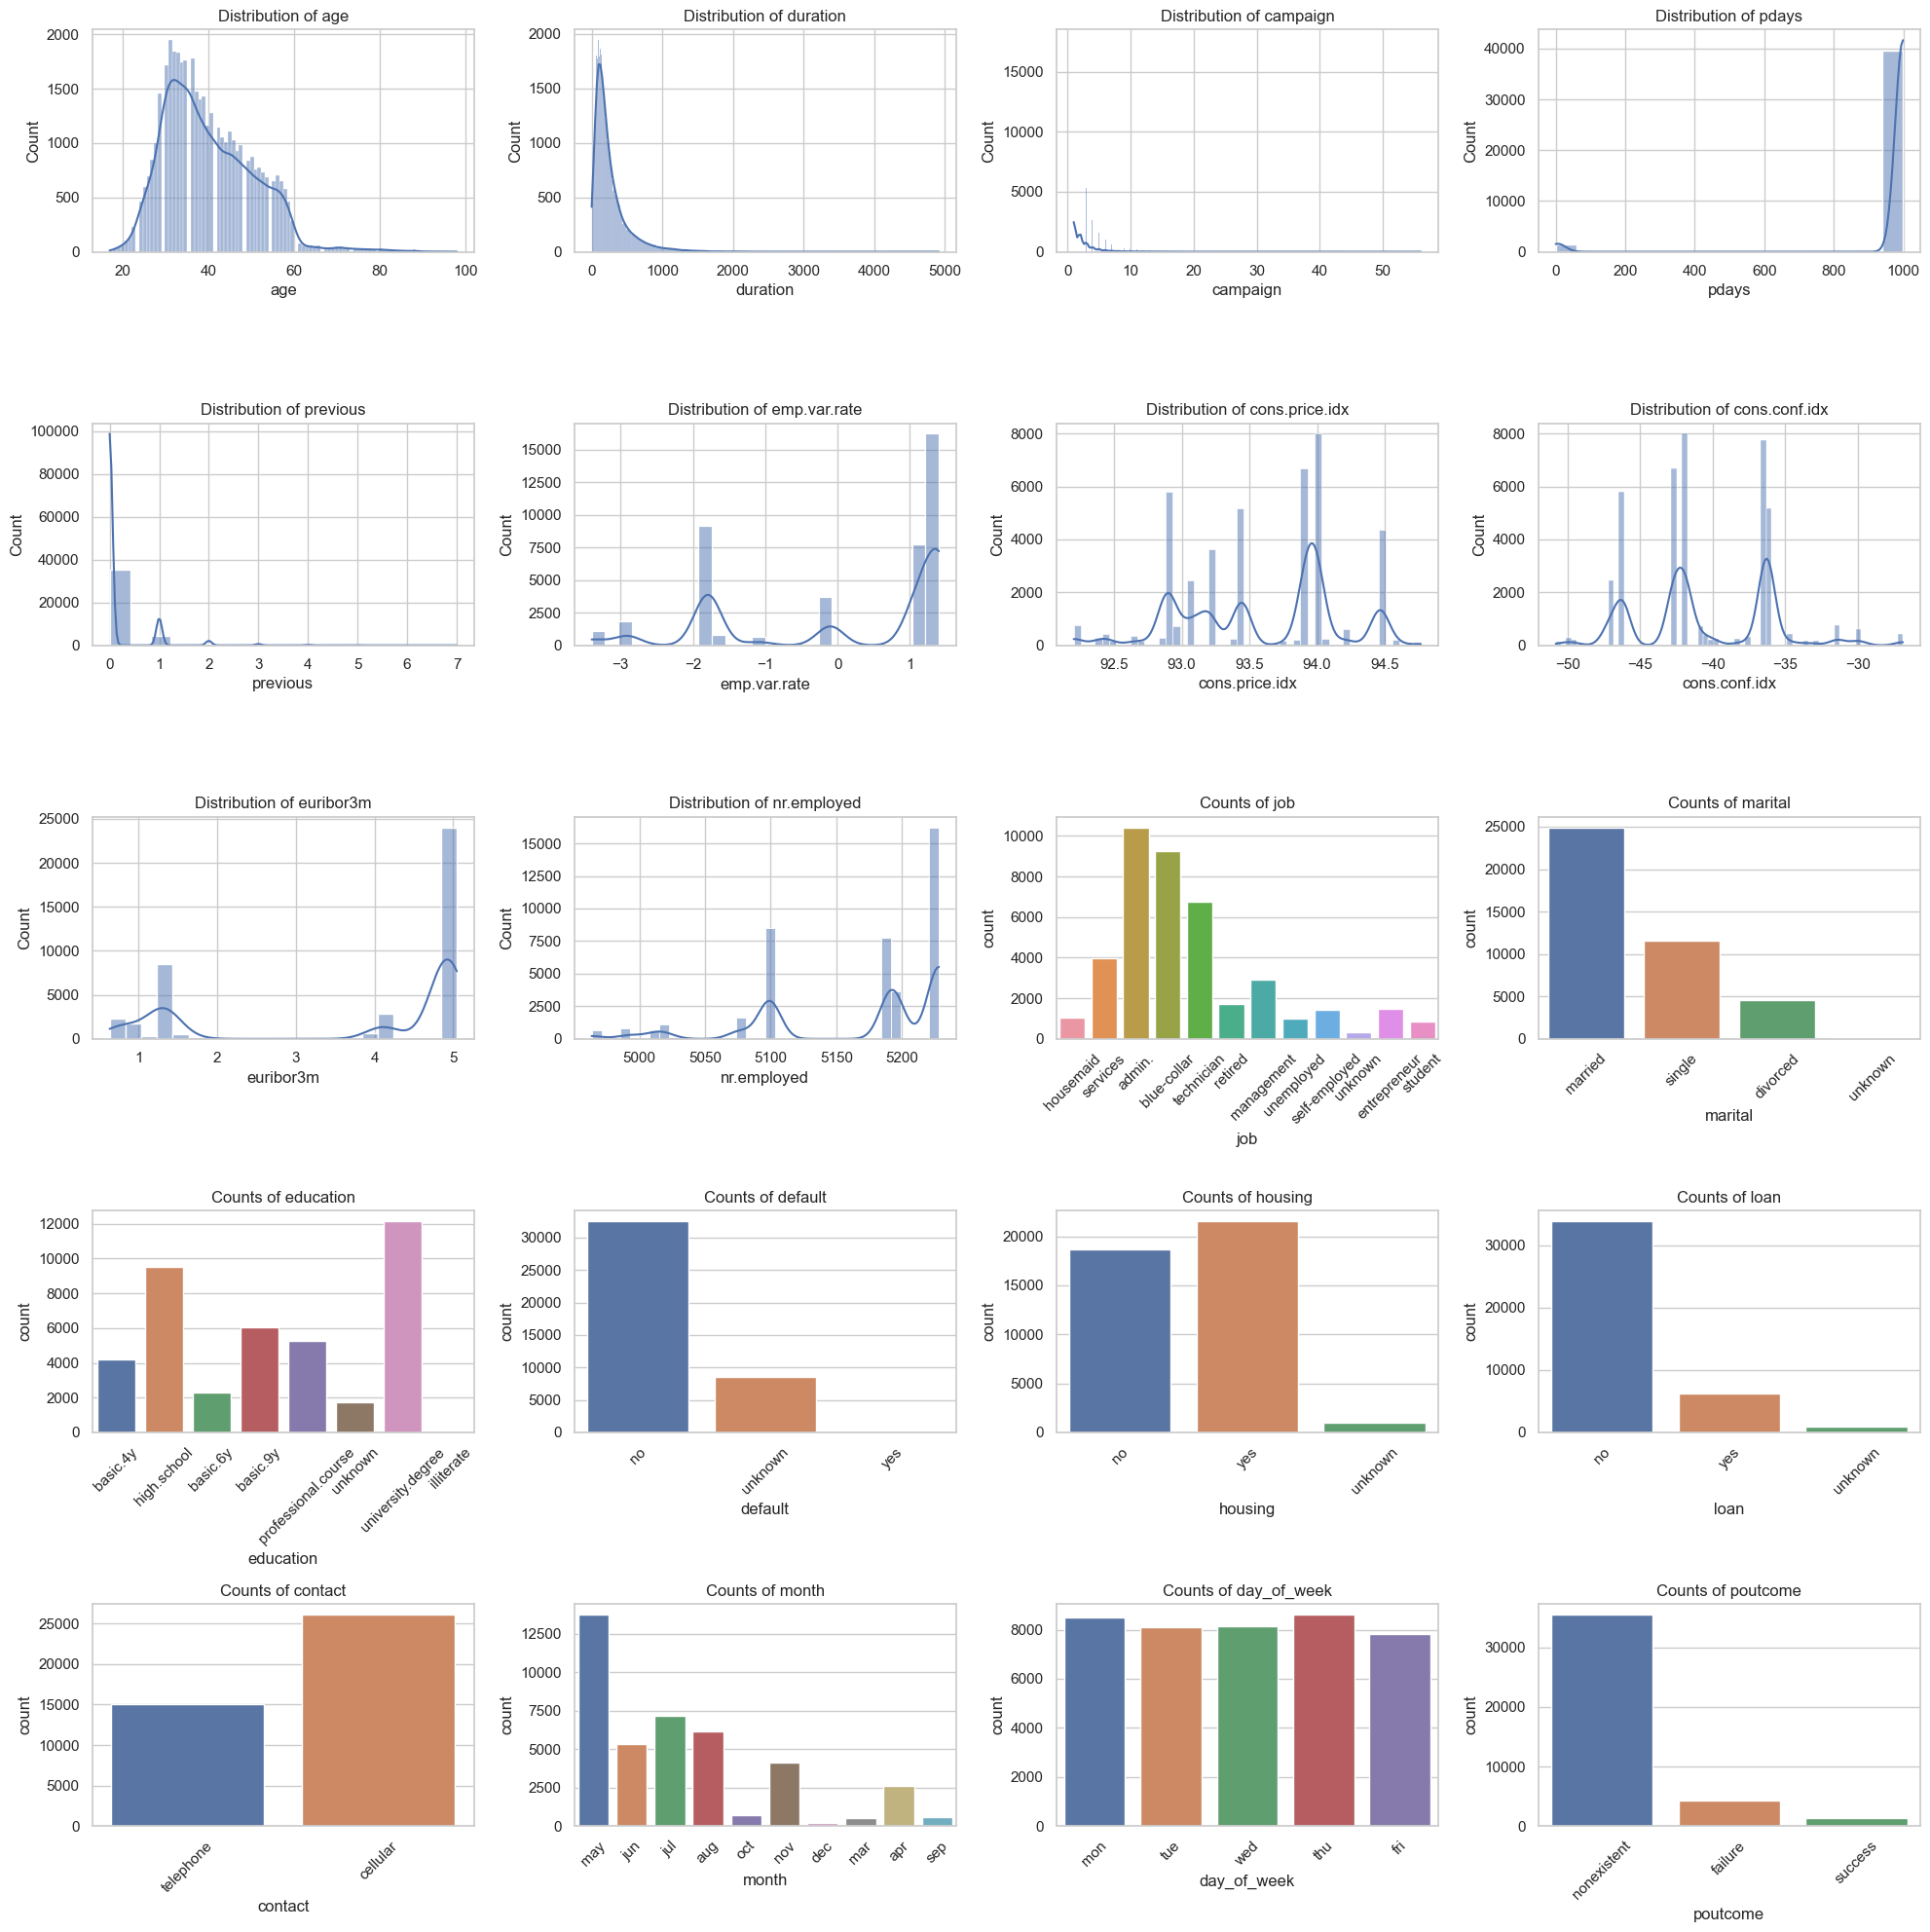

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is named 'df'

# Numeric features
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Categorical features
categorical_features = ['job', 'marital', 'education', 'default',
                        'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Set up subplots for visualizations
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Plot numeric feature distributions
for i, feature in enumerate(numeric_features):
    row = i // 4
    col = i % 4
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Plot categorical feature counts
for i, feature in enumerate(categorical_features):
    row = (i + len(numeric_features)) // 4
    col = (i + len(numeric_features)) % 4
    sns.countplot(data=df, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Counts of {feature}')
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust plot layout
plt.tight_layout()
plt.show()

In [122]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [123]:
df[df['class'] == 'yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [124]:
df[df['class'] == 'no'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
std,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,163.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [125]:
le = preprocessing.LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['day_of_week'] = le.fit_transform(df['day_of_week'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['class'] = le.fit_transform(df['class'])

In [126]:
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(32950, 20) (8238, 20)
(32950,) (8238,)


In [127]:
logit_model = smf.Logit(y_train, X_train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.212903
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                32950
Model:                          Logit   Df Residuals:                    32930
Method:                           MLE   Df Model:                           19
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.3952
Time:                        15:01:09   Log-Likelihood:                -7015.2
converged:                       True   LL-Null:                       -11599.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0050      0.002      2.380      0.017       0.001       0.009
job              

In [128]:
# make prediction
y_pred = logit_model.predict(X_test)
print(y_pred)

17589    0.011582
3158     0.008024
2118     0.015921
12435    0.060522
13939    0.007409
           ...   
33427    0.033598
32280    0.051938
25947    0.094552
13050    0.034510
39975    0.780928
Length: 8238, dtype: float64


In [129]:
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.66      0.41      0.50       928

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

[[7117  193]
 [ 552  376]]


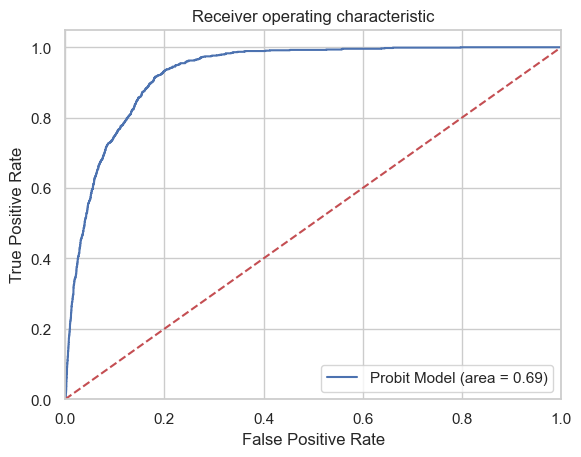

In [130]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logit_model.predict(X_test))

plt.figure()
plt.plot(fpr, tpr, label='Probit Model (area = %0.2f)' % probit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Probit_ROC')
plt.show()